In [1]:
import pandas as pd

data = pd.read_csv("powerlifting_data.csv", low_memory = False)

# Display general info
print("📌 Dataset Info:\n")
print(data.info())

# Check for missing values
print("\n📌 Missing Values:\n")
print(data.isnull().sum())

# Display basic statistics
print("\n📌 Descriptive Statistics:\n")
print(data.describe())

📌 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506544 entries, 0 to 506543
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             506544 non-null  object 
 1   Sex              506544 non-null  object 
 2   Equipment        506544 non-null  object 
 3   Age              506544 non-null  float64
 4   BodyweightKg     506544 non-null  float64
 5   Best3SquatKg     506544 non-null  float64
 6   Best3BenchKg     506544 non-null  float64
 7   Best3DeadliftKg  506544 non-null  float64
 8   TotalKg          506544 non-null  float64
 9   Dots             506544 non-null  float64
 10  Wilks            506544 non-null  float64
 11  Glossbrenner     506544 non-null  float64
dtypes: float64(9), object(3)
memory usage: 46.4+ MB
None

📌 Missing Values:

Name               0
Sex                0
Equipment          0
Age                0
BodyweightKg       0
Best3SquatKg       0
Best3Bench

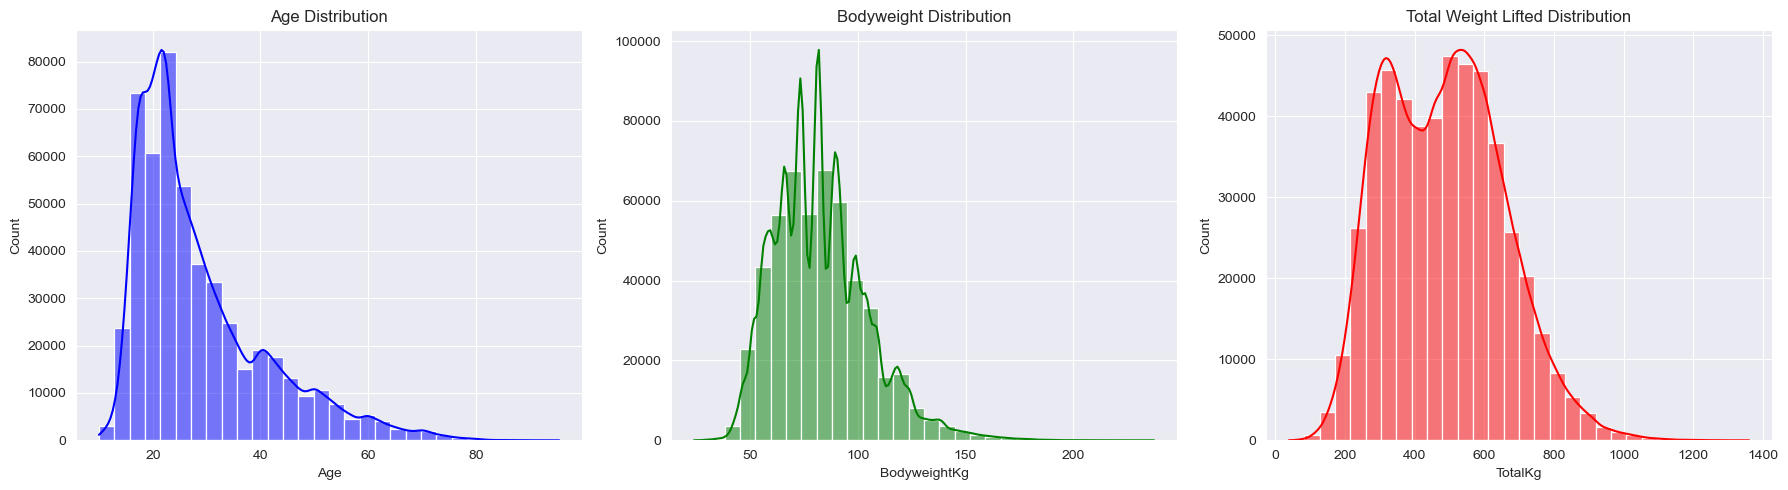

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("darkgrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age Distribution
sns.histplot(data["Age"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Age Distribution")

# Bodyweight Distribution
sns.histplot(data["BodyweightKg"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Bodyweight Distribution")

# TotalKg Distribution
sns.histplot(data["TotalKg"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Total Weight Lifted Distribution")

plt.tight_layout()
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_9140\659353828.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='TotalKg', data= data, palette='coolwarm')


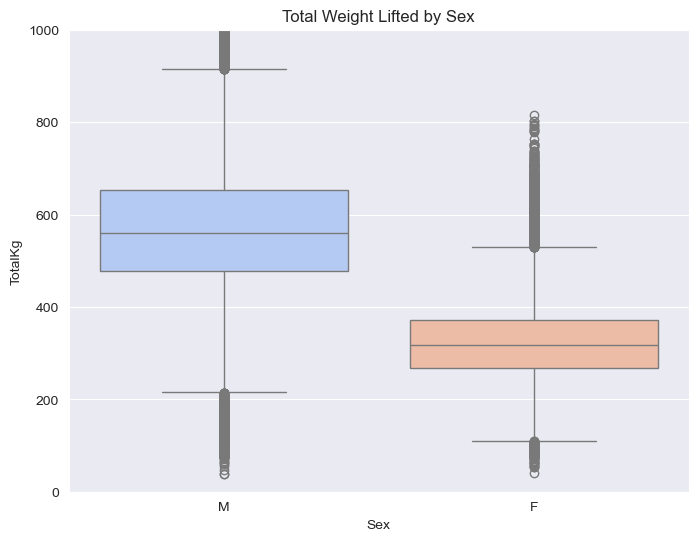

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='TotalKg', data= data, palette='coolwarm')
plt.title('Total Weight Lifted by Sex')
plt.ylim(0, 1000)  # Limiting to 1000kg for better visualization
plt.show()

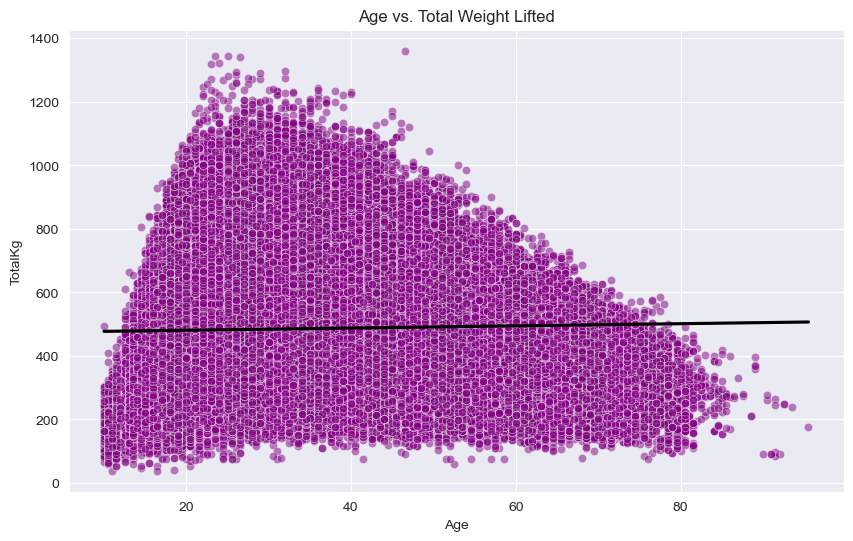

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='TotalKg', data= data, alpha=0.5, color='purple')
sns.regplot(x='Age', y='TotalKg', data=data, scatter=False, color='black')
plt.title('Age vs. Total Weight Lifted')
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_11008\1405507885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Equipment', y='TotalKg', data=data, palette='Set2')


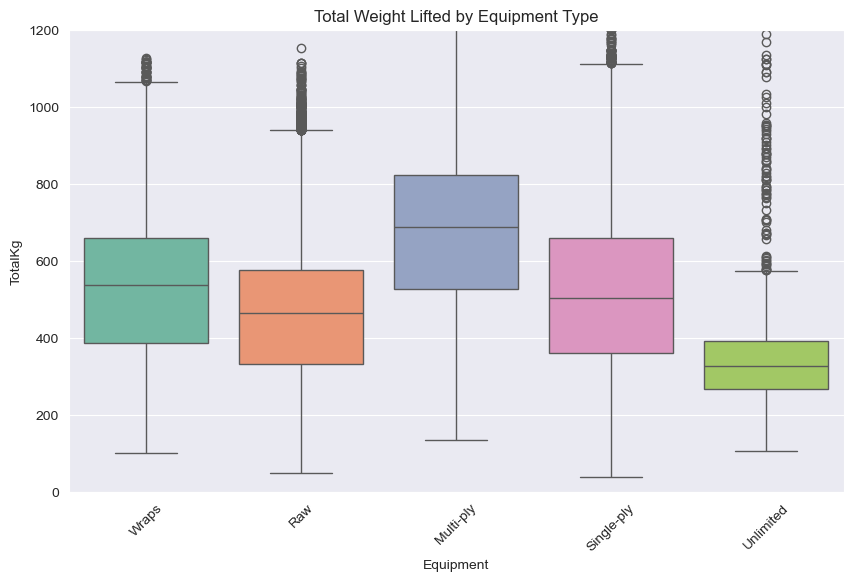

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Equipment', y='TotalKg', data=data, palette='Set2')
plt.title('Total Weight Lifted by Equipment Type')
plt.xticks(rotation=45)
plt.ylim(0, 1200)
plt.show()

Pearson Correlation: 0.0251, p-value: 0.0000
Spearman Correlation: 0.1376, p-value: 0.0000


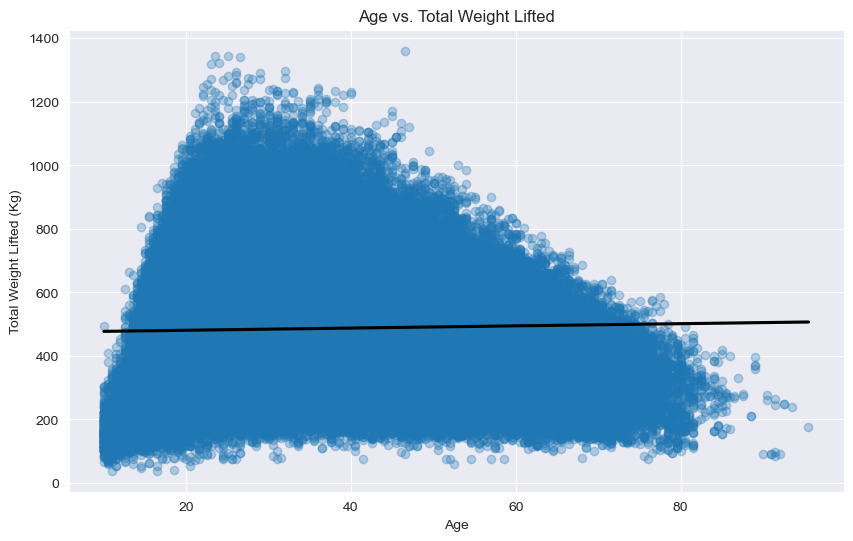

In [4]:
from scipy.stats import pearsonr, spearmanr

# Compute Pearson and Spearman correlation
pearson_corr, pearson_p = pearsonr(data['Age'], data['TotalKg'])
spearman_corr, spearman_p = spearmanr(data['Age'], data['TotalKg'])

print(f"Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p:.4f}")
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p:.4f}")

# Scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='TotalKg', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'black'})
plt.title("Age vs. Total Weight Lifted")
plt.xlabel("Age")
plt.ylabel("Total Weight Lifted (Kg)")
plt.show()

In [16]:
data.columns

Index(['Name', 'Gender', 'Equipment', 'Age', 'BodyweightKg', 'Best3SquatKg',
       'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks',
       'Glossbrenner', 'Age_Group'],
      dtype='object')

In [18]:
data = pd.get_dummies(data, columns=['Equipment'], prefix='Equipment', dtype=int)

In [20]:
data.head(15)

,Name,Gender,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Age_Group,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Unlimited,Equipment_Wraps
0,Elvis Žaļims,1,13.0,59.1,85.0,40.0,100.0,225.0,192.30,194.58,190.17,1,0,0,0,0,1
1,Aļona Staņēviča,0,20.5,62.4,52.5,45.0,100.0,197.5,213.66,213.65,188.68,4,0,0,0,0,1
2,Tomass Rihards Chiapas,1,11.0,66.9,80.0,47.5,100.0,227.5,176.49,176.67,171.56,0,0,0,0,0,1
3,Lauris Kalašņikovs,1,13.0,60.3,110.0,80.0,160.0,350.0,294.21,297.15,290.09,1,0,0,0,0,1
4,Laura Šembele,0,13.5,73.5,65.0,40.0,110.0,215.0,211.67,207.03,182.25,1,0,0,0,0,1
5,Kristers Zaķis,1,13.0,72.6,85.0,50.0,120.0,255.0,186.86,185.96,179.93,1,0,0,0,0,1
6,Andris Džeriņš,1,18.5,82.9,190.0,155.0,205.0,550.0,371.55,367.39,353.42,3,0,0,0,0,1
7,Edmunds Brauns,1,18.5,92.5,190.0,132.5,240.0,562.5,358.82,354.27,339.14,3,0,0,0,0,1
8,Armands Skuja,1,18.5,91.0,130.0,100.0,155.0,385.0,247.57,244.42,234.14,3,0,0,0,0,1
9,Ivo Vegners,1,38.5,96.9,230.0,155.0,270.0,655.0,408.83,403.88,386.02,6,0,0,0,0,1


In [21]:
equipment_counts = data.filter(like='Equipment_').sum()
print(equipment_counts)

Equipment_Multi-ply       8269
Equipment_Raw           339497
Equipment_Single-ply     92296
Equipment_Unlimited       2302
Equipment_Wraps          64180
dtype: int64


In [7]:
# Define Age Group Mapping
def assign_age_group(age):
    if 5 <= age <= 12:
        return 'Youth'
    elif 13 <= age <= 15:
        return 'Teen 13-15'
    elif 16 <= age <= 17:
        return 'Teen 16-17'
    elif 18 <= age <= 19:
        return 'Teen 18-19'
    elif 20 <= age <= 23:
        return 'Juniors'
    elif 24 <= age <= 34:
        return 'Seniors'
    elif 35 <= age <= 39:
        return 'Submasters'
    elif 40 <= age <= 44:
        return 'Masters 40-44'
    elif 45 <= age <= 49:
        return 'Masters 45-49'
    elif 50 <= age <= 54:
        return 'Masters 50-54'
    elif 55 <= age <= 59:
        return 'Masters 55-59'
    elif 60 <= age <= 64:
        return 'Masters 60-64'
    elif 65 <= age <= 69:
        return 'Masters 65-69'
    elif 70 <= age <= 74:
        return 'Masters 70-74'
    elif 75 <= age <= 79:
        return 'Masters 75-79'
    else:
        return 'Masters 80+'

# Apply Age Group Function
data['Age_Group'] = data['Age'].apply(assign_age_group)

In [8]:
data = pd.get_dummies(data, columns=['Age_Group'], prefix='AgeGroup', dtype=int)

In [9]:
age_order = {
    'Youth': 0, 'Teen 13-15': 1, 'Teen 16-17': 2, 'Teen 18-19': 3, 
    'Juniors': 4, 'Seniors': 5, 'Submasters': 6,
    'Masters 40-44': 7, 'Masters 45-49': 8, 'Masters 50-54': 9, 
    'Masters 55-59': 10, 'Masters 60-64': 11, 'Masters 65-69': 12, 
    'Masters 70-74': 13, 'Masters 75-79': 14, 'Masters 80+': 15
}

data['Age_Group'] = data['Age'].apply(assign_age_group)
data['Age_Group'] = data['Age_Group'].map(age_order)

In [28]:
data.columns

Index(['Name', 'Gender', 'Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg',
       'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner',
       'Age_Group', 'Equipment_Multi-ply', 'Equipment_Raw',
       'Equipment_Single-ply', 'Equipment_Unlimited', 'Equipment_Wraps'],
      dtype='object')

In [11]:
age_columns = [col for col in data.columns if col.startswith("AgeGroup_")]
data.drop(columns=age_columns, inplace=True)

In [12]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True, dtype=int)

In [22]:
data.head()

,Name,Gender,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Age_Group,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Unlimited,Equipment_Wraps
0,Elvis Žaļims,1,13.0,59.1,85.0,40.0,100.0,225.0,192.30,194.58,190.17,1,0,0,0,0,1
1,Aļona Staņēviča,0,20.5,62.4,52.5,45.0,100.0,197.5,213.66,213.65,188.68,4,0,0,0,0,1
2,Tomass Rihards Chiapas,1,11.0,66.9,80.0,47.5,100.0,227.5,176.49,176.67,171.56,0,0,0,0,0,1
3,Lauris Kalašņikovs,1,13.0,60.3,110.0,80.0,160.0,350.0,294.21,297.15,290.09,1,0,0,0,0,1
4,Laura Šembele,0,13.5,73.5,65.0,40.0,110.0,215.0,211.67,207.03,182.25,1,0,0,0,0,1


In [24]:
data.rename(columns={'Sex_M': 'Gender'}, inplace=True)

# Verify the change
print(data.head())

                     Name  Gender   Age  BodyweightKg  Best3SquatKg  \
0            Elvis Žaļims       1  13.0          59.1          85.0   
1         Aļona Staņēviča       0  20.5          62.4          52.5   
2  Tomass Rihards Chiapas       1  11.0          66.9          80.0   
3      Lauris Kalašņikovs       1  13.0          60.3         110.0   
4           Laura Šembele       0  13.5          73.5          65.0   

   Best3BenchKg  Best3DeadliftKg  TotalKg    Dots   Wilks  Glossbrenner  \
0          40.0            100.0    225.0  192.30  194.58        190.17   
1          45.0            100.0    197.5  213.66  213.65        188.68   
2          47.5            100.0    227.5  176.49  176.67        171.56   
3          80.0            160.0    350.0  294.21  297.15        290.09   
4          40.0            110.0    215.0  211.67  207.03        182.25   

   Age_Group  Equipment_Multi-ply  Equipment_Raw  Equipment_Single-ply  \
0          1                    0              0

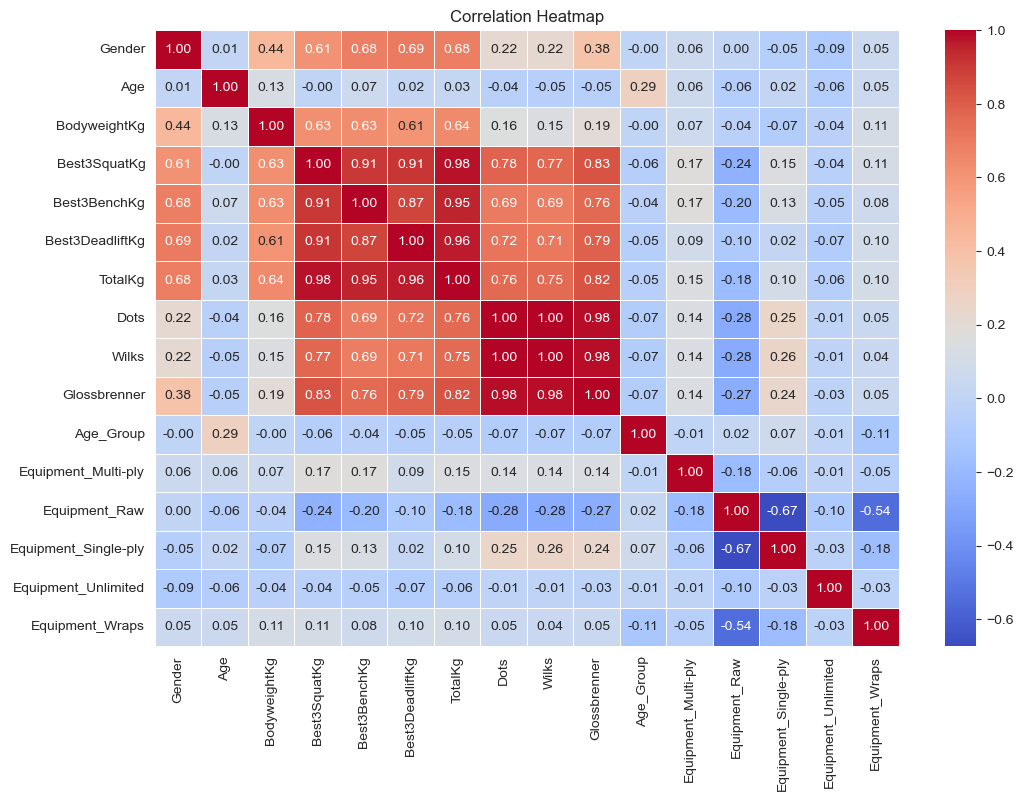

In [25]:
# Exclude 'Name' before correlation calculation
correlation_matrix = data.drop(columns=['Name']).corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [26]:
from scipy.stats import zscore

# Selecting only continuous numeric columns
numeric_cols = ['Age', 'BodyweightKg', 'Best3SquatKg', 'Best3BenchKg', 
                'Best3DeadliftKg', 'TotalKg', 'Dots', 'Wilks', 'Glossbrenner']

# Compute Z-score
z_scores = data[numeric_cols].apply(zscore)

# Count values where |Z| > 3 (outliers)
outliers_z = (abs(z_scores) > 3).sum()
print("Outliers based on Z-score:")
print(outliers_z)


Outliers based on Z-score:
Age                6778
BodyweightKg       4830
Best3SquatKg       2899
Best3BenchKg       3099
Best3DeadliftKg     263
TotalKg            1574
Dots               2253
Wilks              2294
Glossbrenner       1678
dtype: int64


In [27]:
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Count values outside 1.5 * IQR range
outliers_iqr = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers based on IQR:")
print(outliers_iqr)


Outliers based on IQR:
Age                23315
BodyweightKg        8734
Best3SquatKg        4094
Best3BenchKg        3554
Best3DeadliftKg      190
TotalKg             1763
Dots                6975
Wilks               7057
Glossbrenner        4885
dtype: int64


In [30]:
data.to_csv("dataset.csv", index = False)

In [1]:
import pandas as pd

data = pd.read_csv("dataset.csv", low_memory = False)
data.head()

,Name,Gender,Age,BodyweightKg,Best3SquatKg,Best3BenchKg,Best3DeadliftKg,TotalKg,Dots,Wilks,Glossbrenner,Age_Group,Equipment_Multi-ply,Equipment_Raw,Equipment_Single-ply,Equipment_Unlimited,Equipment_Wraps
0,Elvis Žaļims,1,13.0,59.1,85.0,40.0,100.0,225.0,192.30,194.58,190.17,1,0,0,0,0,1
1,Aļona Staņēviča,0,20.5,62.4,52.5,45.0,100.0,197.5,213.66,213.65,188.68,4,0,0,0,0,1
2,Tomass Rihards Chiapas,1,11.0,66.9,80.0,47.5,100.0,227.5,176.49,176.67,171.56,0,0,0,0,0,1
3,Lauris Kalašņikovs,1,13.0,60.3,110.0,80.0,160.0,350.0,294.21,297.15,290.09,1,0,0,0,0,1
4,Laura Šembele,0,13.5,73.5,65.0,40.0,110.0,215.0,211.67,207.03,182.25,1,0,0,0,0,1


In [2]:
def assign_bodyweight_group(bw):
    if bw < 60:
        return 'Lightweight (<60kg)'
    elif 60 <= bw < 75:
        return 'Middleweight (60–75kg)'
    elif 75 <= bw < 90:
        return 'Upper Middleweight (75–90kg)'
    elif 90 <= bw < 105:
        return 'Heavyweight (90–105kg)'
    elif 105 <= bw < 120:
        return 'Super Heavyweight (105–120kg)'
    else:
        return 'Ultra Heavyweight (120kg+)'

data['Bodyweight_Group'] = data['BodyweightKg'].apply(assign_bodyweight_group)


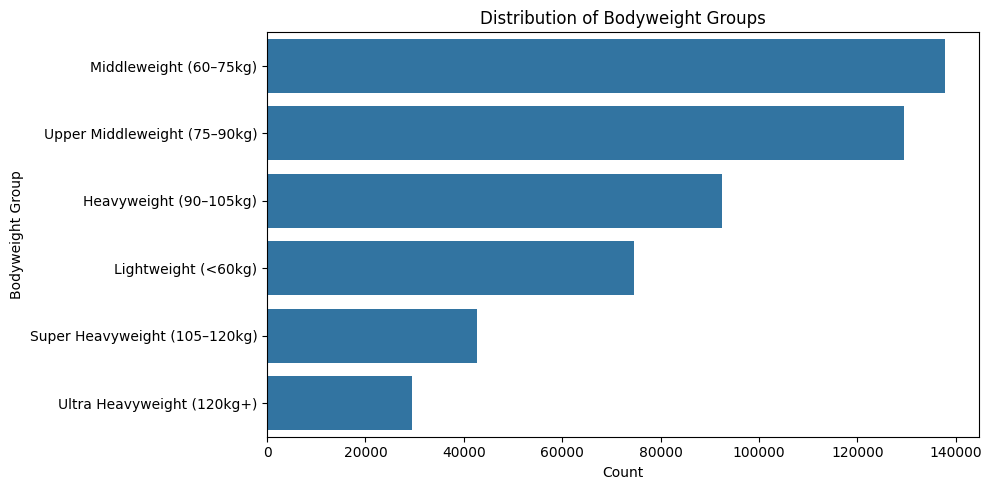

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.countplot(y='Bodyweight_Group', data=data, order=data['Bodyweight_Group'].value_counts().index)
plt.title("Distribution of Bodyweight Groups")
plt.xlabel("Count")
plt.ylabel("Bodyweight Group")
plt.tight_layout()
plt.show()